# 개요

## What is Scikit-Learn?

**파이썬 기반 오픈소스 머신러닝 라이브러리**

1. 학습 : 기존에 측정된 데이터를 학습한다
2. 예측 : 학습된 데이터를 기반으로 미래 데이터를 예측한다

## When Using this?

기존에 보유한 데이터로 인과관계를 밝혀내고자 할 때 사용한다


(사용 예시)

- 주가, 환율 등 과거 경제지표를 통해 미래를 예측하고자 할 때
- 은행에서 고객을 분류하여 대출을 승인하거나 거절하는 기준을 적용할때
- 비슷한 소비패턴을 가진 고객 유형을 군집으로 묶어내려고 할 때

(예시 구분)
- 분류 : 스팸 메일 필터링, 이미지 분류, 고객 이탈 예측 등
- 회귀 : 주택 가격 예측, 판매량 예측 등
- 클러스터링 : 고객 세분화, 문서 군집화 등
- 차원 축소 : 고차원 데이터를 저차원 공간으로 변환 > 시각화 or 노이즈 제거



## How Working?



0. 문제정의 : 데이터를 통해 문제를 정의한다.
1. 데이터 준비 : NumPy Array, Pandas DataFrame 형태로 준비
2. 데이터 전처리 : 결측치 처리 등 학습 가능한 형태로 처리
3. 데이터 분할 : 학습 데이터와 테스트 데이터로 분할
 - 학습 데이터 : 정답을 알려줌. Label data
 - 테스트데이터 : 정답을 기반으로 훈련하는 값. train data
 - train_test_split (stratify = taget 조정

4. 모델 선택 : 선형회귀모델, 로지스틱 회귀모델 등
5. 훈련 : fit(train data 넣기)
6. 예측 : model.predict
7. 평가 : 모델의 성능 평가 accuracy_score(y_test, y_pred)
8. 해석 : 모델의 계수 확인 > 각 특성의중요도를 파악

[Scikit-Learn Official Document](https://scikit-learn.org/stable/getting_started.html)

# 선형회귀분석 (Linear Regression)

## 01. 회귀분석의 개념

회귀분석은 과거 데이터를 통해 미래의 정확한 수치를 예측하기 위해 사용

독립변수와 종속변수 간의 관계를 모델링하는 통계적인 방법

이를 통해 독립변수의 변화에 따른 종속변수의 변화를 예측할 수 있음

## 02. Linear Regression을 하는 이유:

- 변수 간의 관계를 이해하고 설명하기 위해
- 미래 값을 예측하기 위해
- 복잡한 현상을 단순화하여 이해하기 위해
- 여러 변수의 영향력을 비교하기 위해

## 03. 수학적인 표현방법





y = Wx + b

- y : 종속변수 (예측하고자 하는 값)
- W : 가중치 (독립변수의 영향력)
- x : 독립변수 (종속변수에 영향을 주는 값. 과거 데이터를 수치화함)
- b : y절편 (y = 0일 때, y의 값)




> 1차 방정식으로 직선의 방정식을 나타낸다.

> Linear Regression은 이 직선이 데이터를 가장 잘 설명하도록 W와 b를 찾는 과정

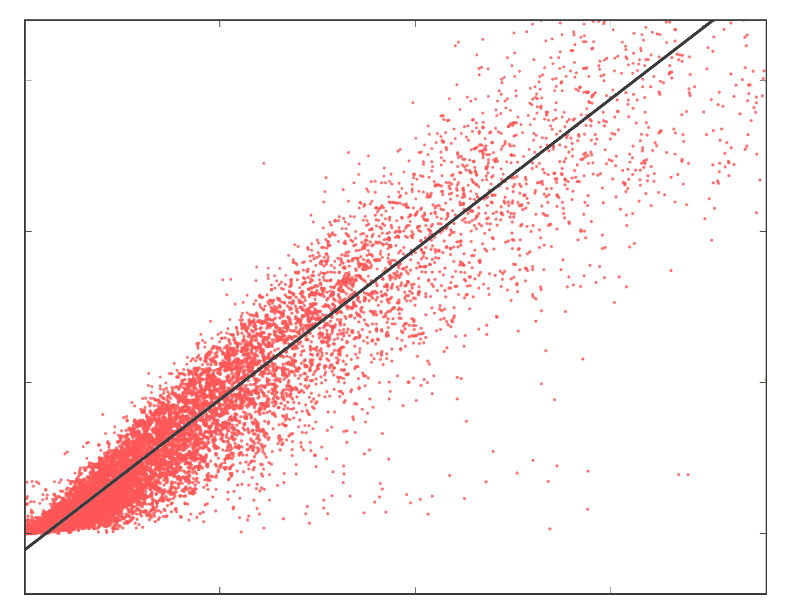

## 04. 실습

### Simple EX

#### **[ 데이터 생성 ]**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

**x데이터 생성**

In [ ]:
# 1차원 데이터 생성
n = 10
x = np.arange(n)
# x를 가지고 1차원 x * n array 생성

print(x)
print(x.shape) # 10행임
print(type(x))

[0 1 2 3 4 5 6 7 8 9]
(10,)
<class 'numpy.ndarray'>


In [ ]:
# 2차원 데이터로 변환

x = np.arange(n).reshape(-1, 1)
# 배열 x를 10행(-1) 1열(1) 열 벡터로 변환한다

print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


**y 데이터 생성**

In [ ]:
# y = 2x+1
y = (2*x + 1)

# y는 아직 값을 모르는 임의의 값으로 Hypothesis(가설)이라고도 한다.
# 앞으로 x와 y에 여러 데이터값을 집어넣어서
# 진짜 y에 어떤 값이 들어가는데 적당한지 찾아가는 과정을 해볼거임
# 진짜 y에 들어가는 값은 Hypothesis 상태의 y와 구분하기 위해 y^으로 표현한다.

print(y)
print(y.shape)
# x가 2차원 데이터이므로, y도 2차원 열 벡터로 생성된다!

[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]
(10, 1)


**랜덤으로 테스트 데이터를 생성한다**

In [ ]:
# numpy > random.seed()함수 사용

np.random.seed(14)
# seed 안에 아무 숫자를 안넣어도 되고, 어떤 정수를 넣어도 무방하나, 다시 재현 가능한지 여부가 중요하다.
# 같은 시드값을 사용하면 항상 같은 난수 시퀸스가 생성되므로, 똑같은 실험을 재현할 수 있다.
# 완전 랜덤하게 만들어지는걸 방지하기 위한 장치일뿐, 숫자에 너무 집착하지 말자!

randValue = np.random.random(n) * 3
print(randValue)

# 0~3 사이의 랜덤 난수값 10개를 생성해서 randValue에 넣어준다
# *3을 곱한 이유 : 원래 선형 관계(2x=1)에 약간의 무작위성(노이즈)를 추가하기 위해서!

[1.54183003 2.31949516 2.61128306 0.02414085 0.92920778 2.87281122
 1.53935014 0.95485327 1.61759981 0.66376483]


**여기까지 전체 코드의 의미**

**선형 회귀 모델이 노이즈가 있는데도 원래의 2x+1의 관계를 잘 찾아낼수 있을지 테스트 베이스를 만드는 과정이었음**

In [ ]:
# 난수를 2차원 배열로 만든다
randValue = randValue.reshape(-1, 1)

# y(가설) 데이터에 난수 집어넣기

randValue = randValue.reshape(-1,1)
y = (2*x + 1)

# y data에 노이즈값을 추가한다
noise_y = y + randValue
print(noise_y)

[[ 2.54183003]
 [ 5.31949516]
 [ 7.61128306]
 [ 7.02414085]
 [ 9.92920778]
 [13.87281122]
 [14.53935014]
 [15.95485327]
 [18.61759981]
 [19.66376483]]


#### **[ 데이터 시각화 ]**

선형관계 확인

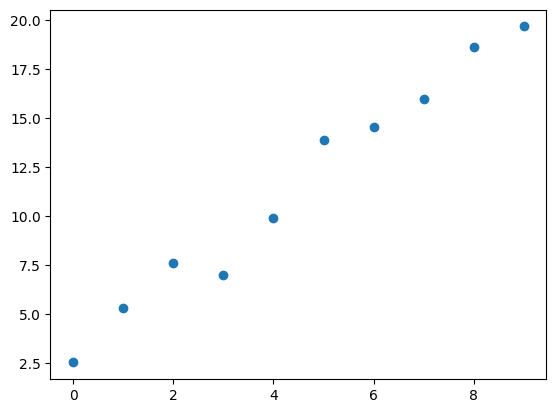

In [ ]:
# 그려보자

import matplotlib.pyplot as plt
%matplotlib inline
# 이 화면에서 바로 보여줘

plt.scatter(x, noise_y)
plt.show()

####  **[ 모델 학습 ]**

모델 선언 > 학습(fit) > 예측(predict)

앞서 만든 간단한 데이터로 모델을 학습시킨다.

In [ ]:
# STEP 1. 모델 선언

# LinearRegression 모델을 생성한다


model = LinearRegression()

In [ ]:
# STEP 2. 학습

# x 데이터와 noisy_y 데이터를 이용하여 모델을 학습시킨다
# x data (문제) + noise_ y data (레이블) -> 지도학습


model.fit(x, noise_y)

LinearRegression()

In [ ]:
# 모델 평가: 학습된 모델을 이용하여 새로운 x 값에 대한 y 값을 예측

# 모델에서 찾은 기울기(w)
print(model.coef_)

# 모델에서 찾은 바이어스값(b)
print(model.intercept_)

[[1.91146199]]
[2.90585466]


In [ ]:
# STEP 3. 예측
prediction = model.predict([[20.0],[21.0]])

print(prediction)

# 앞으로 이 데이터는 41, 43까지 갈거다
# 선형 모델로 예측하는 거임

[[41.13509444]
 [43.04655643]]


#### **[ 데이터 분할 ]**

Train_test_split 설명

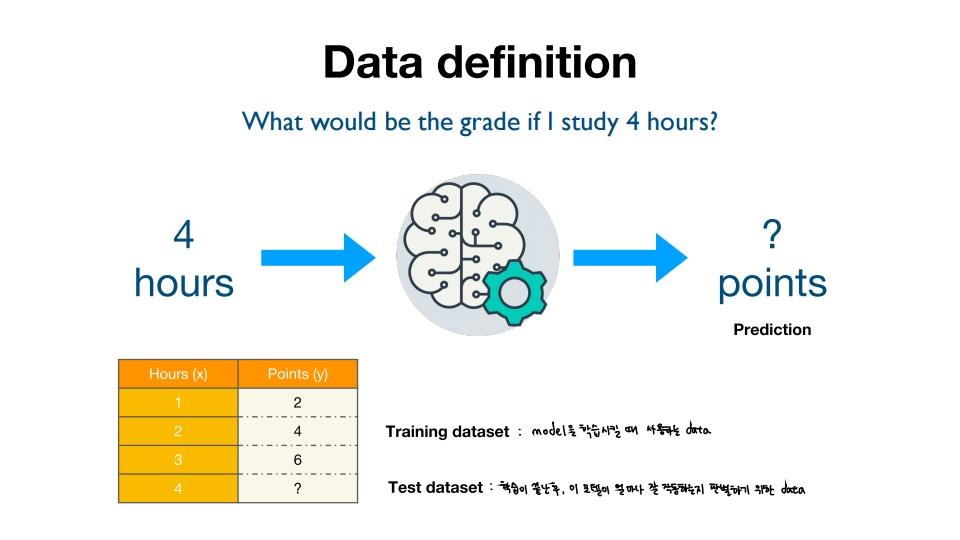

이제부터 본격적으로 모델을 학습시킨다.

모델을 학습시킬때에는 훈련용 데이터와 테스트용 데이터로 구분해서 학습시킨다.

테스트용 데이터를 얼마나 맞췄는지에 따라 모델의 정확도를 평가할 수 있다.

- Training dataset : model을 학습시킬 때 사용 하는 data (정답)
- Test dataset : 학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하기 위한 data (문제)

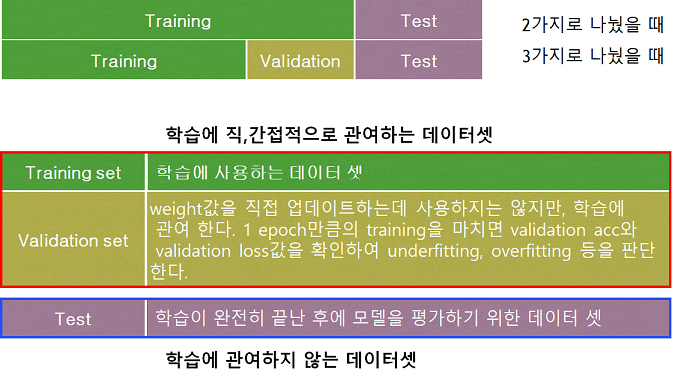

**[ 데이터 분할 ]**

전체 데이터를 학습 데이터와 테스트 데이터로 분할한다


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
n = 10
X = np.arange(n)
# x를 가지고 1차원 x * n array 생성

X = np.arange(n).reshape(-1, 1)

Y = (2*x + 1)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)
# 데이터(X)만 넣었을 경우 train : test = 8 : 2
# X 데이터셋(리스트)을 test-> 0.2, train->0.8으로 나눠서 넣는다 선언

# random_state -> random.seed값과 동일하다
# random_state 고정해서 나중에 재시험을 치를때도 같은 inpu&output이 나오게 체리피킹

print(X_train)
print(X_test)

[[7]
 [5]
 [8]
 [3]
 [1]
 [6]
 [9]
 [2]]
[[4]
 [0]]


In [ ]:
# 데이터(X)와 레이블(Y)을 넣을 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=321)
                                    # x, y를 같이 shuffle. 비율은 8:2
                                    # 문법 순서만 기억하면 됨

print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[7]
 [9]
 [6]
 [2]
 [0]
 [1]
 [8]
 [4]]
[[15]
 [19]
 [13]
 [ 5]
 [ 1]
 [ 3]
 [17]
 [ 9]]
[[5]
 [3]]
[[11]
 [ 7]]


In [ ]:
# 리스트를 NumPy array로 변환
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# shape 확인
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 1)
(2, 1)
(8, 1)
(2, 1)


#### **[ 모델 평가 ]**

- 오차 측정: 예측값과 실제값의 차이를 측정하여 모델의 성능을 평가한다. (예: Mean Squared Error, Mean Absolute Error)
- 시각화: 예측 결과를 시각화하여 모델의 성능을 시각적으로 확인한다.

In [ ]:
from sklearn.metrics import mean_squared_error

# 모델 학습
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

In [ ]:
# MSE 계산
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

MSE: 3.944304526105059e-31


**[ 모델 평가 해석 ]**

- mean_squared_error: 실제 값과 예측 값의 차이의 제곱의 평균을 구하는 함수
- 모델의 예측 오차를 측정하는 지표입니다.
- MSE가 낮을수록: 모델의 예측 성능이 좋다는 의미입니다.

#### **[ 시각화 ]**

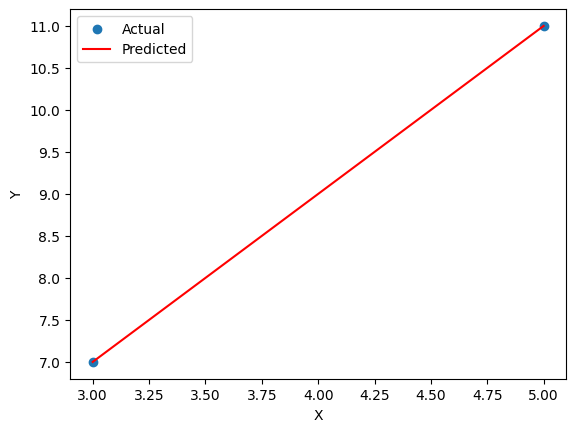

In [ ]:
# 실제 값과 예측 값 시각화
plt.scatter(X_test, Y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

[클로드3 예](https://claude.ai/chat/dc86a22c-f37a-4786-9c05-694a9a42f6d2)

### 캘리포니아 주택가격 (Linear)

* 이전에는 보스턴 주택가격으로 실습했으나, 윤리적 문제(흑인/하위층/범죄를 묶어서 연관시킨 이력)으로 데이터가 사라짐

#### Data Import

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# train_test_split : sklearn에 학습시킬때, train data와 test data를 같이 넣어서 학습시킬 때 사용함

In [68]:
# Califonia 주택 가격 데이터셋 로드
housing = fetch_california_housing()
X = housing.data
Y = housing.target

housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [71]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [72]:
# 데이터프레임으로 변환
df = pd.DataFrame(X, columns=housing.feature_names)
df['PRICE'] = y

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [73]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# 예측
y_pred = model.predict(X_test)

In [77]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Mean squared error:  0.5558915986952422
R-squared score:  0.5757877060324524


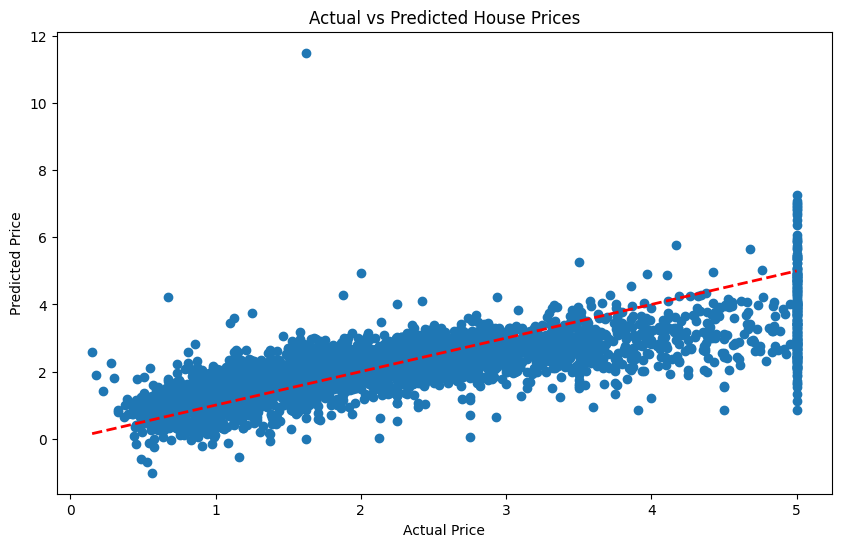

In [78]:
# 실제 값과 예측 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

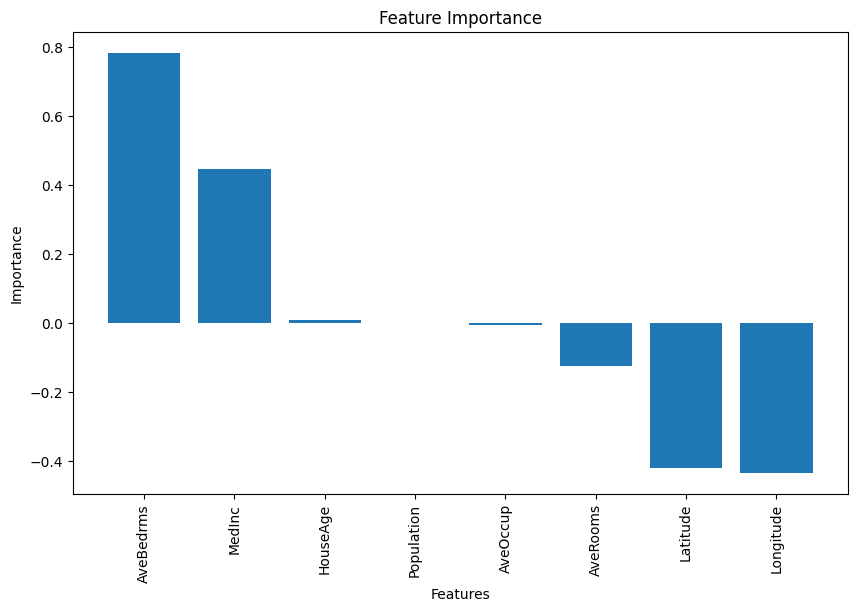

In [79]:
# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': housing.feature_names, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# 붓꽂 예제 (iris Species Classification)

수업시간

**데이터 설명**

목적 : 붓꽃 데이터 세트로 붓꽃 품종 예측하기
특징 :
- 붓꽃은 꽃잎의 길이와 너비, 꽃받침의 길이와 너비로 품종이 구분된다.
- 붓꽃의 꽃잎의 길이와 너비, 꽃받침의 길이와 너비가 주어진다.

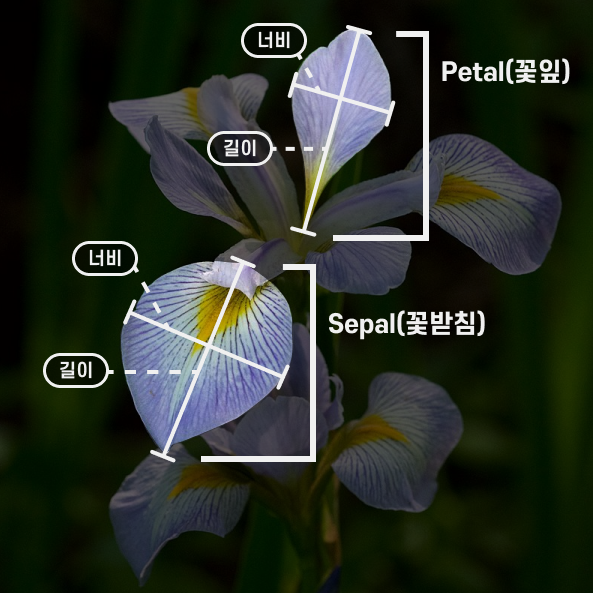

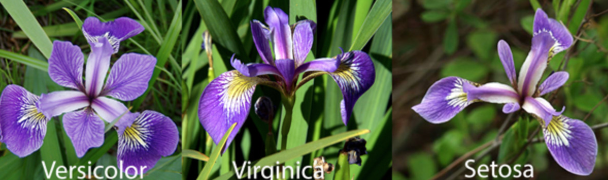

## 01. 문제정의

붓꽃(Iris) 데이터셋을 이용하여 붓꽃의 품종(setosa, versicolor, virginica)을 예측하는 모델을 만든다.

붓꽃의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 등의 특징을 이용하여 어떤 품종의 붓꽃인지 분류하는 문제입니다.

## 02. 데이터 준비

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# 데이터 로드
iris = load_iris()


print(iris)
# iris 데이터는 array에 담겨있음

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
print(iris['DESCR'])

# 데이터만 봐서는 뭐가 뭔지 잘 모른다. description 보자

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

앞서, 붓꽃은 꽃잎의 길이와 너비, 꽃받침의 길이와 너비로 품종이 구분된다 했다.

- 붓꽃 꽃잎은 spal, 꽃받침은 petal이라고 한다
- 품종 : setosa   versicolor   virginica
- 데이터 수 : 각 종류씩 50개씩 (전체 150개)

In [3]:
# 데이터 살펴보기


# 타겟 데이터 (품종)
print(iris.target)
# 0: setosa    1: versicolor    2:virginica


# 특징 이름
print(iris.feature_names)

# 타겟 이름 == 라벨
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
# 아직 데이터 프레임 아님!

data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
target = iris['target']
target[:5]

print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 03. 데이터 탐색

In [5]:
# 데이터 프레임만들기

df_iris = pd.DataFrame(data, columns=iris['feature_names'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
# target 추가

df_iris['target'] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [27]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 시각화

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

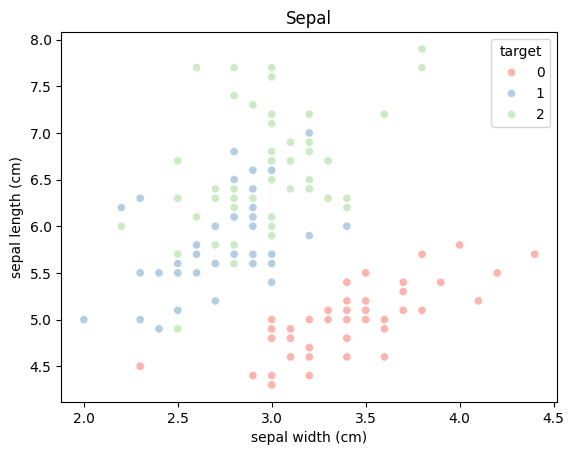

In [33]:
# 산점도로 그리고 x축은 sepal width / y축은 sepal lenth / 범례 : target

sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue = 'target', palette='Pastel1')
plt.title('Sepal')
plt.show()

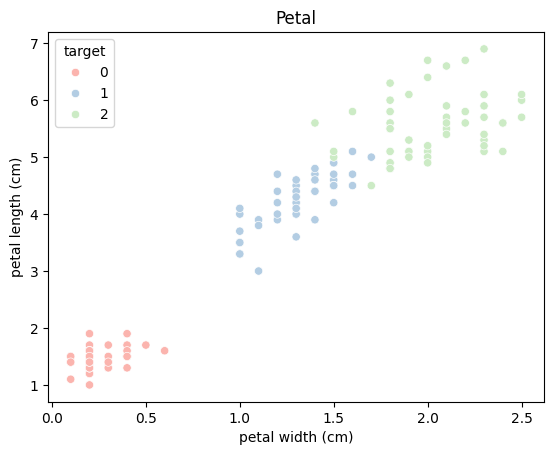

In [37]:
# 이번엔 산점도로 petal 그리기

sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='target', palette='Pastel1', data=df_iris)
plt.title('Petal')
plt.show()

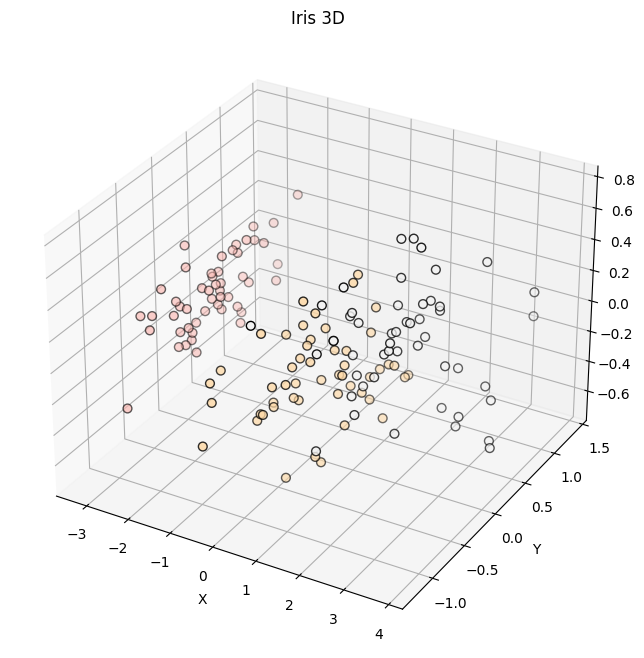

In [39]:
# Sepal, Petal 3차원으로 그리기

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# 3D 그래프 그리기
# 그래프 객체 생성: plt.figure()로 그래프 객체를 생성하고
# fig.add_subplot()으로 3차원 축을 추가한다.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 차원 축소: PCA를 이용하여 4차원 데이터를 3차원으로 축소한다
# n_components=3은 3개의 주성분을 사용하겠다는 의미
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop(columns=['target']))

# 산점도 그리기: ax.scatter()를 이용하여 3차원 산점도를 그린다
# c=df_iris['target']: 색깔을 품종별로 다르게 설정
# cmap=plt.cm.Pastel1: 색상표 설정
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'], cmap=plt.cm.Pastel1, edgecolor='k', s=40)

# 제목
ax.set_title('Iris 3D')

# 축 이름 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 그래프 보여주기
plt.show()

## 04. 데이터셋 나누기

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
# train 8 : test 2

x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', axis=1), df_iris['target'], test_size = 0.25, random_state=123)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(112, 4) (112,)
(38, 4) (38,)


In [44]:
# y_train 데이터 중에서 value의 갯수세기
y_train.value_counts()

,count
target,
1,42
2,36
0,34


<Axes: xlabel='target'>

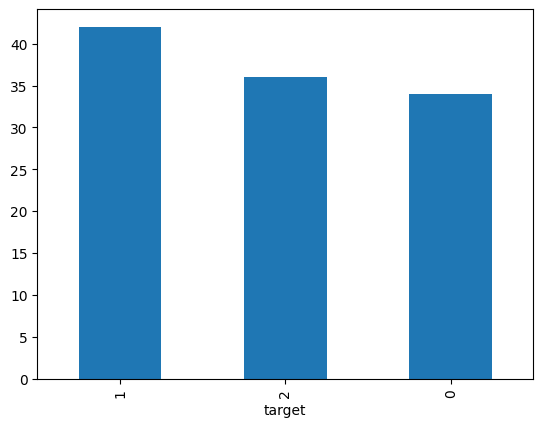

In [48]:
# y_train 데이터 중에서 value 수량 체크
y_train.value_counts().plot(kind='bar')

<Axes: xlabel='target', ylabel='count'>

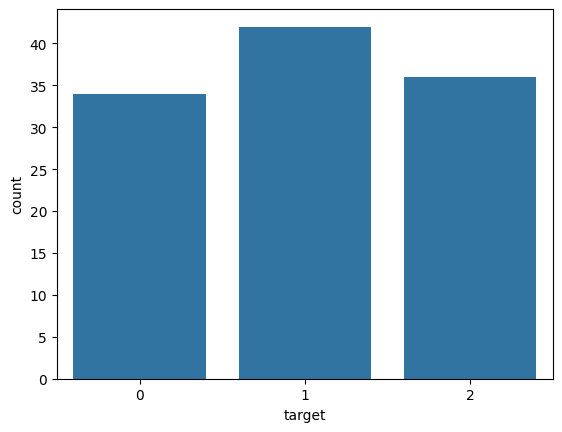

In [49]:
sns.countplot(x = y_train)

### stratify 사용해서 다시 data 생성

In [50]:

# 분류 문제를 다룰때 사용하는 중요한 옵션값
# stratify 값을 target으로 지정해주면 각각 class ratio를 유지하면서 train과test로 데이터를 나누어 준다
# 만약, 비율이 유지되지 않을 경우 성능 차이가 생길 수 있다.

x_train, x_test, y_train, y_test = train_test_split(df_iris.drop('target', axis=1), df_iris['target'], test_size = 0.25, random_state=123, stratify=df_iris['target'])

In [51]:
y_train.value_counts()

,count
target,
0,38
1,37
2,37


In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


In [54]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
36,5.5,3.5,1.3,0.2
29,4.7,3.2,1.6,0.2
55,5.7,2.8,4.5,1.3
118,7.7,2.6,6.9,2.3


## 모델학습

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [57]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
prediction = model.predict(x_test)

In [60]:
print(prediction)

[2 0 1 2 0 0 1 2 1 0 1 0 2 2 1 2 0 0 0 0 0 0 1 2 0 2 2 2 2 1 1 2 1 1 2 1 2
 1]


In [61]:
print(y_test)

135    2
34     0
61     1
117    2
42     0
38     0
65     1
125    2
80     1
19     0
64     1
33     0
115    2
146    2
94     1
116    2
28     0
32     0
9      0
17     0
40     0
22     0
93     1
144    2
2      0
77     1
122    2
138    2
110    2
56     1
66     1
101    2
68     1
76     1
105    2
86     1
127    2
92     1
Name: target, dtype: int64


In [59]:
# predition과 y_test가 결과가 같은 값의 누적 확률
# 97.3% 정확도
(prediction == y_test).mean()

0.9736842105263158

[1. 수업진도 나간 노트](https://drive.google.com/file/d/1pNmDz9kHcP-tyN5gOc70ILZiiU7ldwQX/view?usp=sharing)

[2. 제미나이 설명](https://gemini.google.com/app/94f05884944c22a0?hl=ko)

[3. 클로드3 설명](https://claude.ai/chat/a0985a9b-4cb3-42d0-bdfa-d1cb7447c2d5)

[4. Kaggle 베스트](https://www.kaggle.com/code/abdmental01/unveiling-the-champion-selecting-the-best-model)
